In [ ]:
#MARKET BASKET ANALYSIS USING ASSOCIATION RULE MINING

#DWDM (AD211)



In [77]:
#Importing the libraries:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt

In [78]:
#Loading our dataset
#Dataset source - https://www.kaggle.com/datasets/dragonheir/basket-optimisation

df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
## DATA PRE-PROCESSING

#Data Cleaning
# Replacing NaN values with 0.
df.fillna(0,inplace=True)

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# Data Transformation

# Converting data into list format:
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....

transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [83]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [84]:
transactions[1]

['burgers', 'meatballs', 'eggs']

In [85]:
# ------------------- Data Warehousing Integration -------------------

# Creating product dimension table:
unique_items = set(item for transaction in transactions for item in transaction)
dim_products = pd.DataFrame({
    'product_id': range(1, len(unique_items)+1),
    'product_name': list(unique_items)
})


In [86]:
import random

# Simulate 50 unique customers
dim_customers = pd.DataFrame({
    'customer_id': range(1, 51),
    'customer_name': [f'Customer_{i}' for i in range(1, 51)],
    'region': random.choices(['North', 'South', 'East', 'West'], k=50)
})

# Simulate 100 days for transactions
dim_time = pd.DataFrame({
    'time_id': range(1, 101),
    'day': [f'Day_{i}' for i in range(1, 101)],
    'month': ['Jan'] * 10 + ['Feb'] * 10 + ['Mar'] * 10 + ['Apr'] * 10 + ['May'] * 10 +
             ['Jun'] * 10 + ['Jul'] * 10 + ['Aug'] * 10 + ['Sep'] * 10 + ['Oct'] * 10,
    'year': [2023] * 100
})


In [87]:
#Using Random module for values:
fact_sales = []

# Assign a customer and time to each transaction
for i, transaction in enumerate(transactions):
    customer_id = random.choice(dim_customers['customer_id'])
    time_id = random.choice(dim_time['time_id'])
    
    for item in transaction:
        product_id = dim_products.loc[dim_products['product_name'] == item, 'product_id'].values[0]
        fact_sales.append({
            'sale_id': i + 1,
            'customer_id': customer_id,
            'product_id': product_id,
            'time_id': time_id,
            'quantity': 1,
            'amount': random.randint(5, 100)  
        })

fact_sales_df = pd.DataFrame(fact_sales)


In [88]:
# Merge with dimensions to simulate OLAP view
sales_enriched = fact_sales_df.merge(dim_customers, on='customer_id')
sales_enriched = sales_enriched.merge(dim_products, on='product_id')
sales_enriched = sales_enriched.merge(dim_time, on='time_id')

# Final warehouse-style dataset
sales_enriched.head()


,sale_id,customer_id,product_id,time_id,quantity,amount,customer_name,region,product_name,day,month,year
0,1,2,10,72,1,48,Customer_2,South,shrimp,Day_72,Aug,2023
1,1527,27,10,72,1,98,Customer_27,West,shrimp,Day_72,Aug,2023
2,1375,1,10,72,1,48,Customer_1,South,shrimp,Day_72,Aug,2023
3,4344,3,10,72,1,33,Customer_3,South,shrimp,Day_72,Aug,2023
4,1,2,9,72,1,40,Customer_2,South,almonds,Day_72,Aug,2023


In [89]:
import pandas as pd
import random

# ----- Dimension Tables -----

# Customers
dim_customers = pd.DataFrame({
    'customer_id': range(1, 51),
    'customer_name': [f'Customer_{i}' for i in range(1, 51)],
    'region': random.choices(['North', 'South', 'East', 'West'], k=50)
})

# Products
unique_items = ['Milk', 'Bread', 'Butter', 'Jam', 'Eggs', 'Coffee', 'Juice', 'Banana', 'Apple', 'Chips']
dim_products = pd.DataFrame({
    'product_id': range(1, len(unique_items) + 1),
    'product_name': unique_items
})

# Time
dim_time = pd.DataFrame({
    'time_id': range(1, 101),
    'day': [f'Day_{i}' for i in range(1, 101)],
    'month': ['Jan'] * 100,
    'year': [2023] * 100
})

# ----- Simulated Fact Table -----

fact_transactions = []

# Simulate 200 transactions
for sale_id in range(1, 201):
    customer_id = random.choice(dim_customers['customer_id'])
    product_id = random.choice(dim_products['product_id'])
    time_id = random.choice(dim_time['time_id'])
    quantity = random.randint(1, 5)
    amount = quantity * random.randint(10, 50)

    fact_transactions.append({
        'sale_id': sale_id,
        'customer_id': customer_id,
        'product_id': product_id,
        'time_id': time_id,
        'quantity': quantity,
        'amount': amount
    })

fact_transactions = pd.DataFrame(fact_transactions)


In [90]:
print("Fact Table (fact_transactions):")
print(fact_transactions.head())

print("\nDimension Table (dim_customers):")
print(dim_customers.head())

print("\nDimension Table (dim_products):")
print(dim_products.head())

print("\nDimension Table (dim_time):")
print(dim_time.head())


Fact Table (fact_transactions):
   sale_id  customer_id  product_id  time_id  quantity  amount
0        1           14           5        8         4      48
1        2           23           9       25         5     120
2        3           42           7       37         2      24
3        4           46           1        8         2      50
4        5           35           6        8         3      99

Dimension Table (dim_customers):
   customer_id customer_name region
0            1    Customer_1  North
1            2    Customer_2   West
2            3    Customer_3   West
3            4    Customer_4   West
4            5    Customer_5  South

Dimension Table (dim_products):
   product_id product_name
0           1         Milk
1           2        Bread
2           3       Butter
3           4          Jam
4           5         Eggs

Dimension Table (dim_time):
   time_id    day month  year
0        1  Day_1   Jan  2023
1        2  Day_2   Jan  2023
2        3  Day_3   Jan  2

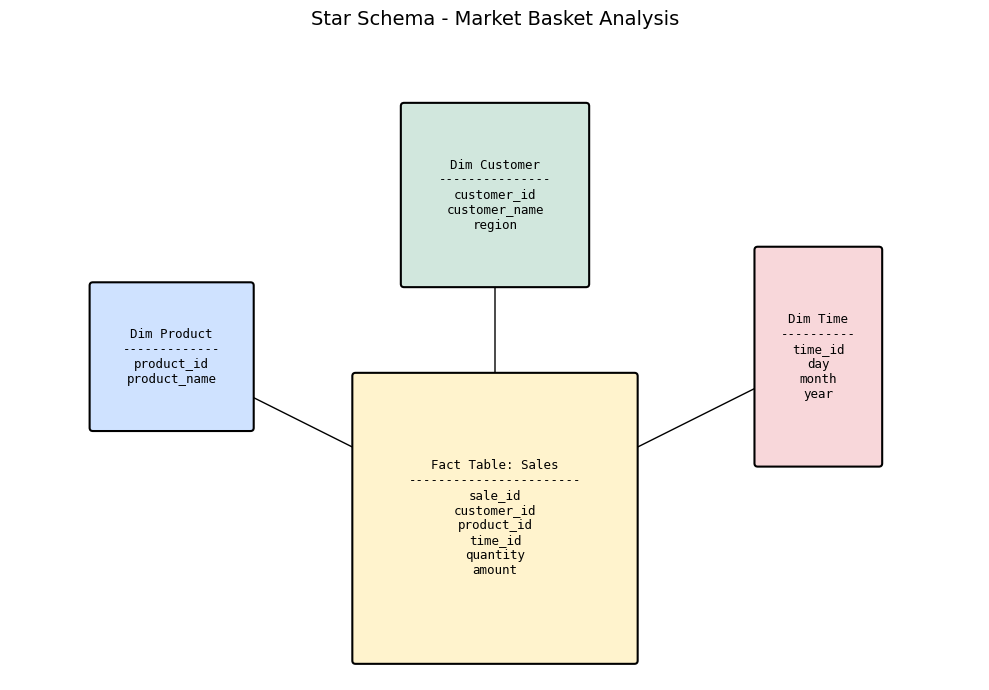

In [91]:
#STAR SCHEMA

import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch

# Create directed graph
G = nx.DiGraph()

# Define table labels
fact_table = "Fact Table: Sales\n-----------------------\nsale_id\ncustomer_id\nproduct_id\ntime_id\nquantity\namount"

dim_products = "Dim Product\n-------------\nproduct_id\nproduct_name"
dim_customers = "Dim Customer\n---------------\ncustomer_id\ncustomer_name\nregion"
dim_time = "Dim Time\n----------\ntime_id\nday\nmonth\nyear"

# Add nodes
G.add_node('fact', label=fact_table)
G.add_node('product', label=dim_products)
G.add_node('customer', label=dim_customers)
G.add_node('time', label=dim_time)

# Add edges (dimension → fact)
G.add_edges_from([
    ('product', 'fact'),
    ('customer', 'fact'),
    ('time', 'fact')
])

# Position nodes
pos = {
    'fact': (0, 0),
    'product': (-2, 1),
    'customer': (0, 2),
    'time': (2, 1)
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Star Schema - Market Basket Analysis', fontsize=14)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax, arrowstyle='-|>', arrowsize=20)

# Draw custom node boxes with labels
node_colors = {
    'fact': '#fff3cd',        # light yellow
    'product': '#cfe2ff',     # light blue
    'customer': '#d1e7dd',    # light green
    'time': '#f8d7da'         # light red/pink
}

for node, (x, y) in pos.items():
    label = G.nodes[node]['label']
    lines = label.split('\n')
    width = max(len(line) for line in lines) * 0.075
    height = len(lines) * 0.22

    # Draw rectangle box with rounded corners
    bbox = FancyBboxPatch((x - width/2, y - height/2), width, height,
                          boxstyle="round,pad=0.02", linewidth=1.5,
                          facecolor=node_colors[node], edgecolor='black')
    ax.add_patch(bbox)
    ax.text(x, y, label, ha='center', va='center', fontsize=9, family='monospace')

# Turn off axes
ax.set_xlim(-3, 3)
ax.set_ylim(-1, 3)
ax.axis('off')
plt.tight_layout()
plt.show()


In [92]:
#Applying APRIORI Algorithm: 

# Call apriori function which requires minimum support, confidance and lift, min length i.e, combination of item default is 2".
rules = apriori(transactions, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)

## min_support = 0.003 -> means selecting items with min support of 0.3%
## min_confidance = 0.2 -> means min confidance of 20% 
## min_lift = 3  
## min_length = 2 -> means no. of items in the transaction should be 2

In [93]:
#It generates a set of rules in a generator file...
rules


<generator object apriori at 0x000001F67E8BB320>

In [94]:
# They need to be converted in a list..
Results = list(rules)
Results

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [95]:
# Converting results in a dataframe:
df_results = pd.DataFrame(Results)

In [96]:
df_results.head()

,items,support,ordered_statistics
0,"(brownies, cottage cheese)",0.003466,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(chicken, light cream)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(escalope, mushroom cream sauce)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(pasta, escalope)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(fresh bread, tomato juice)",0.004266,"[((fresh bread), (tomato juice), 0.09907120743..."


In [97]:
# Keeping support in a dataframe 
support = df_results.support

In [98]:

# convert orderstatistic in a proper format.
# order statistic has lhs => rhs as well rhs => lhs 
# Choosing 'df_results['ordered_statistics'][i][0]'
 

#all four empty list which will contain lhs, rhs, confidance and lift respectively.
first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. 
# first and second element was frozenset which need to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [99]:
# Converting all four lists into dataframe:
lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)

confidance=pd.DataFrame(third_values,columns=['Confidance'])

lift=pd.DataFrame(fourth_value,columns=['lift'])

In [100]:
# Concatenating all lists together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final

,0,1,0,1,2,support,Confidance,lift
0,brownies,None,cottage cheese,None,None,0.003466,0.102767,3.225330
1,chicken,None,light cream,None,None,0.004533,0.075556,4.843951
2,escalope,None,mushroom cream sauce,None,None,0.005733,0.072269,3.790833
3,escalope,None,pasta,None,None,0.005866,0.073950,4.700812
4,fresh bread,None,tomato juice,None,None,0.004266,0.099071,3.259356
...,...,...,...,...,...,...,...,...
89,pancakes,ground beef,mineral water,spaghetti,None,0.003066,0.211009,3.532991
90,ground beef,None,mineral water,tomatoes,spaghetti,0.003066,0.031208,3.344117
91,olive oil,None,mineral water,spaghetti,milk,0.003333,0.050607,3.216994
92,mineral water,milk,shrimp,spaghetti,None,0.003066,0.063889,3.014029


In [101]:

#  Replacing none with ' ' and combining three column's in 1 
#  Example : coffee,none,none is converted to coffee, ,

df_final.fillna(value=' ', inplace=True)
df_final.head()

,0,1,0,1,2,support,Confidance,lift
0,brownies,,cottage cheese,,,0.003466,0.102767,3.225330
1,chicken,,light cream,,,0.004533,0.075556,4.843951
2,escalope,,mushroom cream sauce,,,0.005733,0.072269,3.790833
3,escalope,,pasta,,,0.005866,0.073950,4.700812
4,fresh bread,,tomato juice,,,0.004266,0.099071,3.259356


In [102]:
df_final.columns = ['lhs',1,'rhs',2,3,'support','confidance','lift']
df_final.head()

,lhs,1,rhs,2,3,support,confidance,lift
0,brownies,,cottage cheese,,,0.003466,0.102767,3.225330
1,chicken,,light cream,,,0.004533,0.075556,4.843951
2,escalope,,mushroom cream sauce,,,0.005733,0.072269,3.790833
3,escalope,,pasta,,,0.005866,0.073950,4.700812
4,fresh bread,,tomato juice,,,0.004266,0.099071,3.259356


In [103]:
# Adding all three columns to lhs itemset only
df_final['lhs'] = df_final['lhs'] + str(", ") + df_final[1]

df_final['rhs'] = df_final['rhs']+str(", ")+df_final[2] + str(", ") + df_final[3]

In [104]:
df_final.head()

,lhs,1,rhs,2,3,support,confidance,lift
0,"brownies,",,"cottage cheese, ,",,,0.003466,0.102767,3.225330
1,"chicken,",,"light cream, ,",,,0.004533,0.075556,4.843951
2,"escalope,",,"mushroom cream sauce, ,",,,0.005733,0.072269,3.790833
3,"escalope,",,"pasta, ,",,,0.005866,0.073950,4.700812
4,"fresh bread,",,"tomato juice, ,",,,0.004266,0.099071,3.259356


In [105]:
#Dropping columns 1,2 and 3 because now we already appended to lhs column.

df_final.drop(columns=[1,2,3],inplace=True)

In [106]:
df_final.head()

,lhs,rhs,support,confidance,lift
0,"brownies,","cottage cheese, ,",0.003466,0.102767,3.225330
1,"chicken,","light cream, ,",0.004533,0.075556,4.843951
2,"escalope,","mushroom cream sauce, ,",0.005733,0.072269,3.790833
3,"escalope,","pasta, ,",0.005866,0.073950,4.700812
4,"fresh bread,","tomato juice, ,",0.004266,0.099071,3.259356


In [107]:
## Top 10 items, based on lift, Sorted in descending order
df_final.sort_values('lift', ascending=False).head(10)

,lhs,rhs,support,confidance,lift
58,"olive oil,","mineral water, whole wheat pasta,",0.003866,0.058704,6.115863
6,"fromage blanc,","honey, ,",0.003333,0.245098,5.164271
49,"ground beef,","tomato sauce, spaghetti,",0.003066,0.031208,4.980600
1,"chicken,","light cream, ,",0.004533,0.075556,4.843951
3,"escalope,","pasta, ,",0.005866,0.073950,4.700812
28,"ground beef,","french fries, herb & pepper,",0.003200,0.032564,4.697422
11,"pasta,","shrimp, ,",0.005066,0.322034,4.506672
23,"ground beef,","chocolate, herb & pepper,",0.003999,0.040706,4.490183
69,"frozen vegetables,","mineral water, shrimp, chocolate",0.003200,0.033566,4.417225
10,"olive oil,","whole wheat pasta, ,",0.007999,0.121457,4.122410


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
       support                       itemsets
0     0.238368                (mineral water)
1     0.132116                    (green tea)
2     0.076523               (low fat yogurt)
3     0.071457                       (shrimp)
4     0.065858                    (olive oil)
...        ...                            ...
1438  0.003733  (fromage blanc, french fries)
1439  0.003999          (fromage blanc, eggs)
1440  0.003733     (fromage blanc, spaghetti)
1441  0.003066         (flax seed, green tea)
1442  0.003466       (spaghetti, green beans)

[1443 rows x 2 columns]

Top 10 Association Rules by Lift:
                            antecedents                         consequents  \
155           (frozen vegetables, soup)               (mineral water, milk)   
154               (mineral water, milk)           (frozen vegetables, soup)   
82       (frozen vegetables, olive oil)               (mineral water, milk)   
81                (mineral water, milk)      (frozen 

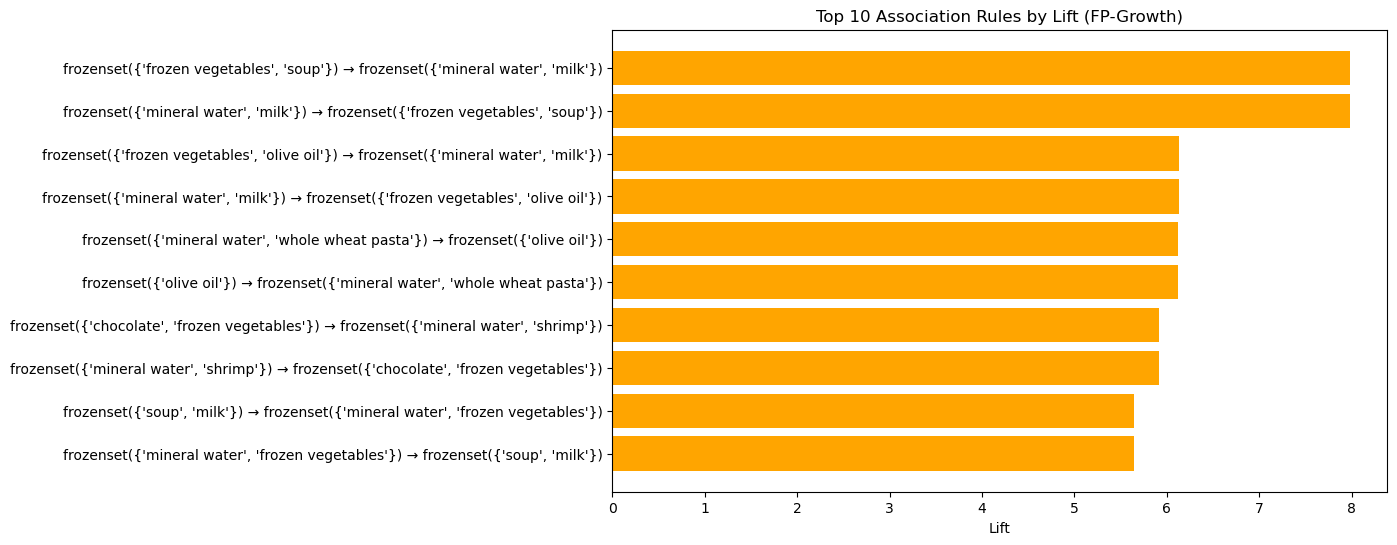

In [108]:
#Applying FP-GROWTH Algorithm: 

# Importing required packages
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Converting the transactions into a one-hot encoded DataFrame
# Creating a dataframe with one-hot encoding of items
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(transactions)

# Creating a DataFrame from the one-hot encoded array
df_onehot = pd.DataFrame(one_hot, columns=mlb.classes_)

# Showing the one-hot encoded DataFrame
df_onehot.head()

# Now applying FP-growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df_onehot, min_support=0.003, use_colnames=True)

# Showing the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Now, to generate the association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

# Displaying the top 10 rules by lift
print("\nTop 10 Association Rules by Lift:")
top_rules_fp = rules.sort_values("lift", ascending=False).head(10)
print(top_rules_fp)

# Plotting the top rules by lift
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
rules_label = top_rules_fp['antecedents'].astype(str) + " → " + top_rules_fp['consequents'].astype(str)
plt.barh(rules_label, top_rules_fp['lift'], color='orange')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift (FP-Growth)')
plt.gca().invert_yaxis()
plt.show()


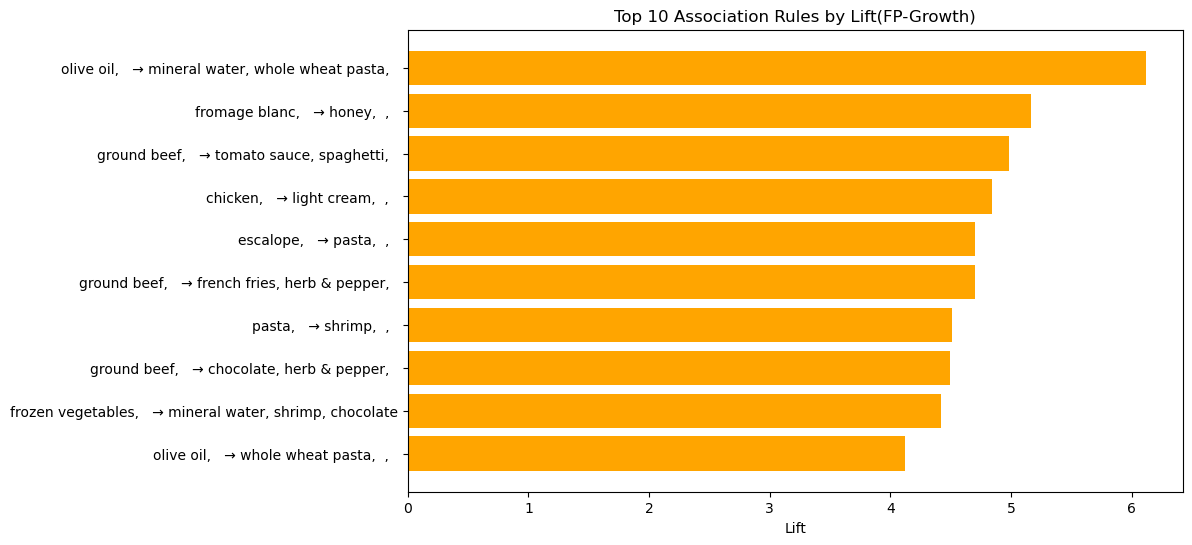

In [109]:
#Transforming Frozenset:

top_rules = df_final.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
rules_label = top_rules['lhs'] + " → " + top_rules['rhs']
plt.barh(rules_label, top_rules['lift'], color='orange')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift(FP-Growth)')
plt.gca().invert_yaxis()
plt.show()


In [126]:
#Algorithm comparison aspects:

import time

# --- APRIORI EXECUTION TIME ---
start_apriori = time.time()
rules_apriori = apriori(transactions, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)
end_apriori = time.time()
apriori_time = end_apriori - start_apriori
print(f"Apriori Execution Time: {apriori_time:.4f} seconds")

# --- FP-GROWTH EXECUTION TIME ---
start_fpg = time.time()
frequent_itemsets_fpg = fpgrowth(df_onehot, min_support=0.003, use_colnames=True)
rules_fpg = association_rules(frequent_itemsets_fpg, metric="lift", min_threshold=3)
end_fpg = time.time()
fpgrowth_time = end_fpg - start_fpg
print(f"FP-Growth Execution Time: {fpgrowth_time:.4f} seconds")


Apriori Execution Time: 0.0000 seconds


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth Execution Time: 40.4309 seconds


In [111]:
print(f"Number of Frequent Itemsets (Apriori): {df_results.shape[0]}")
print(f"Number of Frequent Itemsets (FP-Growth): {frequent_itemsets_fpg.shape[0]}")


Number of Frequent Itemsets (Apriori): 94
Number of Frequent Itemsets (FP-Growth): 1443


In [112]:
# APRIORI
avg_conf_apriori = confidance['Confidance'].mean()
avg_lift_apriori = lift['lift'].mean()
print(f"Apriori - Avg Confidence: {avg_conf_apriori:.4f}, Avg Lift: {avg_lift_apriori:.4f}")

# FP-GROWTH
avg_conf_fpg = rules_fpg['confidence'].mean()
avg_lift_fpg = rules_fpg['lift'].mean()
print(f"FP-Growth - Avg Confidence: {avg_conf_fpg:.4f}, Avg Lift: {avg_lift_fpg:.4f}")


Apriori - Avg Confidence: 0.0750, Avg Lift: 3.4956
FP-Growth - Avg Confidence: 0.1649, Avg Lift: 3.7260


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_pattern

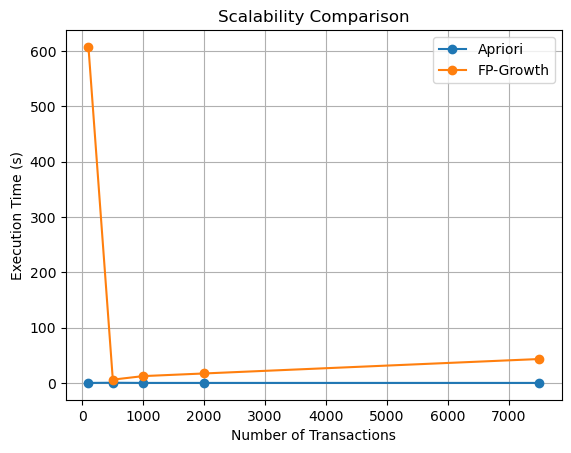

In [117]:
import random
import matplotlib.pyplot as plt

sizes = [100, 500, 1000, 2000, len(transactions)]
apriori_times = []
fpgrowth_times = []

for size in sizes:
    subset = transactions[:size]
    one_hot_subset = pd.DataFrame(mlb.transform(subset), columns=mlb.classes_)

    # Apriori
    start = time.time()
    _ = apriori(subset, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)
    apriori_times.append(time.time() - start)

    # FP-Growth
    start = time.time()
    _ = fpgrowth(one_hot_subset, min_support=0.003, use_colnames=True)
    fpgrowth_times.append(time.time() - start)

# Plotting scalability
plt.plot(sizes, apriori_times, label='Apriori', marker='o')
plt.plot(sizes, fpgrowth_times, label='FP-Growth', marker='o')
plt.xlabel('Number of Transactions')
plt.ylabel('Execution Time (s)')
plt.title('Scalability Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [118]:
#Checking few values of dataset
print(sales_enriched.iloc[1000:2001])  # includes row 100 to 200 (201 is exclusive)


      sale_id  customer_id  product_id  time_id  quantity  amount  \
1000     3342           27           1        6         1      64   
1001     4132           49           1        6         1      63   
1002     4998           50          14        6         1      46   
1003     1528            1          47        6         1      99   
1004     2962           27          90        6         1      99   
...       ...          ...         ...      ...       ...     ...   
1996      229           26          78       79         1      19   
1997      524           16          78       79         1      87   
1998     6368            2         108       79         1      79   
1999     3544            8         108       79         1       7   
2000     3933           21         108       79         1      12   

     customer_name region      product_name     day month  year  
1000   Customer_27   West             chili   Day_6   Jan  2023  
1001   Customer_49  South             c

In [121]:
#Dynamic slice

def dynamic_slice(month):
    # Slice: Only transactions from a particular month
    sliced_data = sales_enriched[sales_enriched['month'] == month]
    return sliced_data


month_input = input("Enter the month (e.g., 'Jan', 'Feb', 'Mar'): ")
sliced_result = dynamic_slice(month_input)
print(sliced_result.head())

# Similarly, sir please filter transactions by just replacing 'month' with other attributes like 'region', 'customer_name', 
#for slicing various attributes

      sale_id  customer_id  product_id  time_id  quantity  amount  \
4969      108           29          10       25         1      19   
4970     3629           14          10       25         1       6   
4971     1226           12          10       25         1      18   
4972     6252           11          10       25         1       5   
4973     2179           36          10       25         1      13   

     customer_name region product_name     day month  year  
4969   Customer_29   West       shrimp  Day_25   Mar  2023  
4970   Customer_14  South       shrimp  Day_25   Mar  2023  
4971   Customer_12   East       shrimp  Day_25   Mar  2023  
4972   Customer_11   West       shrimp  Day_25   Mar  2023  
4973   Customer_36  South       shrimp  Day_25   Mar  2023  


In [122]:
#Dynamic Roll - up

def dynamic_roll_up(level='month'):
    if level == 'month':
        roll_up_data = sales_enriched.groupby(['month', 'product_name']).agg({
            'amount': 'sum',
            'quantity': 'sum'
        }).reset_index()
    elif level == 'year':
        roll_up_data = sales_enriched.groupby(['year', 'product_name']).agg({
            'amount': 'sum',
            'quantity': 'sum'
        }).reset_index()
    else:
        roll_up_data = sales_enriched.groupby(['day', 'product_name']).agg({
            'amount': 'sum',
            'quantity': 'sum'
        }).reset_index()
    
    return roll_up_data

level_input = input("Enter the roll-up level ('month', 'year', 'day'): ")
roll_up_result = dynamic_roll_up(level_input)
print(roll_up_result.head())


# Similarly, sir please filter transactions by just replacing 'month' with other attributes like 'region', 'customer_name', 
#for performing roll-up on various attributes


     day       product_name  amount  quantity
0  Day_1          asparagus      80         1
1  Day_1  antioxydant juice      30         1
2  Day_1            avocado     194         3
3  Day_1        babies food      74         1
4  Day_1     barbecue sauce     129         2


In [125]:
# Dynamic Dice

def dynamic_dice(products, month):
    # Dice: Filter transactions for specific products and a specific month
    diced_data = sales_enriched[(sales_enriched['product_name'].isin(products)) &
                                (sales_enriched['month'] == month)]
    return diced_data


products_input = input("Enter products (comma-separated, e.g., 'Coffee, Milk'): ").split(', ')
month_input = input("Enter the month (e.g., 'Jan', 'Feb', 'Mar'): ")
diced_result = dynamic_dice(products_input, month_input)
print(diced_result.head())


# Similarly, sir please filter transactions by just replacing 'month' with other attributes like 'region', 'customer_name', 
#for dicing various attributes

      sale_id  customer_id  product_id  time_id  quantity  amount  \
0           1            2          10       72         1      48   
1        1527           27          10       72         1      98   
2        1375            1          10       72         1      48   
3        4344            3          10       72         1      33   
1371     2209            2          10       78         1      28   

     customer_name region product_name     day month  year  
0       Customer_2  South       shrimp  Day_72   Aug  2023  
1      Customer_27   West       shrimp  Day_72   Aug  2023  
2       Customer_1  South       shrimp  Day_72   Aug  2023  
3       Customer_3  South       shrimp  Day_72   Aug  2023  
1371    Customer_2  South       shrimp  Day_78   Aug  2023  


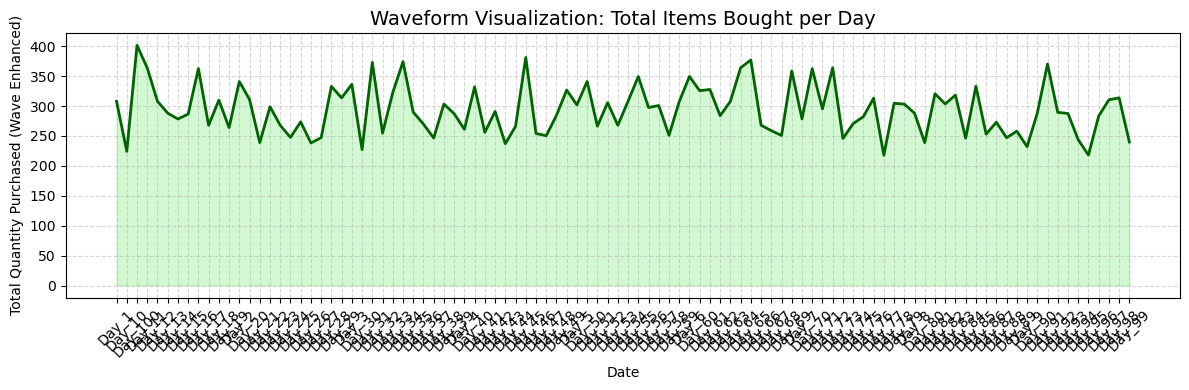

In [ ]:
#Visualizing in the form of waveform:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


daily_items = sales_enriched.groupby('day')['quantity'].sum().reset_index()
wave = daily_items['quantity'] + np.sin(np.linspace(0, 4 * np.pi, len(daily_items))) * 2

plt.figure(figsize=(12, 4))
plt.plot(daily_items['day'], wave, color='darkgreen', linewidth=2)
plt.fill_between(daily_items['day'], wave, color='lightgreen', alpha=0.4)
plt.title("Waveform Visualization: Total Items Bought per Day", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Quantity Purchased (Wave Enhanced)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [129]:
#CONCLUSION TABLE

import pandas as pd


comparison_data = {
    'Metric': [
        'Execution Time (seconds)',
        'Number of Frequent Itemsets',
        'Average Confidence',
        'Average Lift'
    ],
    'Apriori': [
        0.0000,
        94,
        0.0750,
        3.4956
    ],
    'FP-Growth': [
        48.1109,
        1443,
        0.1649,
        3.7260
    ]
}

df_comparison = pd.DataFrame(comparison_data)
try:
    from tabulate import tabulate
    print(tabulate(df_comparison, headers='keys', tablefmt='grid', showindex=False))
except ImportError:
    print(df_comparison)


+-----------------------------+-----------+-------------+
| Metric                      |   Apriori |   FP-Growth |
+=============================+===========+=============+
| Execution Time (seconds)    |    0      |     48.1109 |
+-----------------------------+-----------+-------------+
| Number of Frequent Itemsets |   94      |   1443      |
+-----------------------------+-----------+-------------+
| Average Confidence          |    0.075  |      0.1649 |
+-----------------------------+-----------+-------------+
| Average Lift                |    3.4956 |      3.726  |
+-----------------------------+-----------+-------------+
